In [1]:
import torch
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

# custom functions and classes
from simple_mnist import Model, train, test

In [2]:
transf = transforms.Compose([transforms.ToTensor(),
                                                      transforms.Normalize((0.1307,), (0.3081, ))])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transf)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transf)
testloader = torch.utils.data.DataLoader(trainset, batch_size=1000, shuffle=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


Example data size: torch.Size([1000, 1, 28, 28])


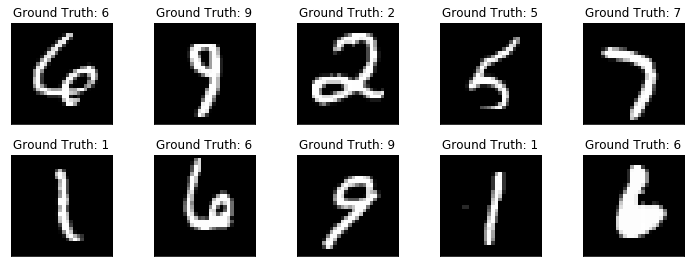

In [4]:
examples = iter(testloader)
example_data, example_targets = examples.next()

print("Example data size:", example_data.shape)

fig = plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [5]:
model = Model()
model.to("cuda")

Model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
train_losses = []
for epoch in range(5):
    losses = train(model, trainloader, optimizer, epoch)
    train_losses = train_losses + losses
    test(model, testloader)

plt.figure(figsize=(7,5))
plt.plot(train_losses)
plt.xlabel("Iterations")
plt.ylabel("Train loss")

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.324611
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.769588
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.724384
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.338636
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.208863
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.488061
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.480668
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.467848
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.321185
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.296107

Test set: Average loss: 0.1687, Accuracy: 57041/60000 (95%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.200723
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.312415
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.347594
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.215927
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.210938
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.381126
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.131165
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.122079
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.135259


In [ ]:
model.eval()

with torch.no_grad():
    output = model(example_data.to("cuda"))

fig = plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])
plt.show()